In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('wine.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [4]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
data['class'].unique()

array([0, 1, 2], dtype=int64)

In [6]:
data['class'].nunique()

3

In [7]:
data['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

<AxesSubplot: ylabel='class'>

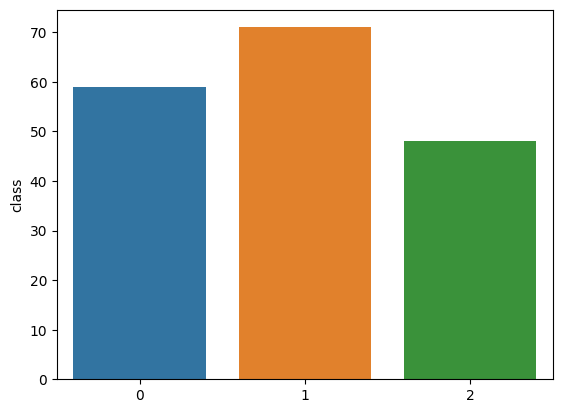

In [8]:
sns.barplot(x = data['class'].value_counts().index, y = data['class'].value_counts())

In [9]:
data.isna().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [12]:
target = data['class']

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [14]:
ss = StandardScaler()
mm = MinMaxScaler()
rs = RobustScaler()

ss_scaled =ss.fit_transform(data)
mm_scaled =mm.fit_transform(data)
rs_scaled =rs.fit_transform(data)

In [15]:
ss_scaled = pd.DataFrame(ss_scaled, columns=data.columns)
mm_scaled = pd.DataFrame(mm_scaled, columns=data.columns)
rs_scaled = pd.DataFrame(rs_scaled, columns=data.columns)

In [16]:
round(ss_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00
mean,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.50,-1.43,-3.68,-2.71,-2.16,-2.09,-1.67,-1.85,-2.07,-1.66,-2.07,-1.87,-1.48,-1.21
25%,-0.81,-0.67,-0.52,-0.71,-0.84,-0.89,-0.87,-0.78,-0.62,-0.79,-0.79,-0.95,-0.77,-1.21
50%,0.04,-0.43,-0.05,-0.02,-0.11,0.02,0.11,-0.19,-0.04,-0.14,0.06,0.25,-0.23,0.07
75%,0.84,0.70,0.72,0.59,0.59,0.82,0.86,0.69,0.65,0.49,0.70,0.80,0.76,1.35
max,2.18,3.05,3.12,3.16,3.77,2.54,3.04,2.35,3.53,3.39,3.26,1.96,2.95,1.35


In [17]:
input_data = data.drop('class',axis=1)
target = data['class']

In [18]:
train_input, test_input, train_target, test_target = train_test_split(input_data, target,
                                                                      random_state=42)

In [19]:
ms = MinMaxScaler()
ms.fit(train_input)
train_scaler = ms.fit_transform(train_input)
test_scaler = ms.fit_transform(test_input)

In [21]:
knc = KNeighborsClassifier()
knc.fit(train_scaler, train_target)
print(knc.score(train_scaler, train_target))
print(knc.score(test_scaler, test_target))

0.9765625
0.9767441860465116


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_target, pred)